In [18]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/nuwa_cluster/home/jackyu/locally_installed_python_pacakges/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [19]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'tsfc', 
            'pressure_reference_high',
            'temperature_reference_high', 
            'pressure_reference_low', 
            'temperature_reference_low',
            'ighigh', 
            'ng', 
            'absth',
            'wgt']


def pattern_assign(name):
    return ''' 
    parameter .* :: .* ({} .* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/]+ {}[^,] [^/]+ / [^/]+ /)
    '''.format(name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [20]:
analysis = scripts.Analysis()

In [21]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'n2o',
                          'band07_wn_1215_1380',
                          'P_500_T_250_min_2.22e-20_max_1.35e-19_ng_2__P_1_T_250_ng_2_dlogN_uniform',
                          'wgt_1_.8_.7_.6',
                          'midlatitude_summer')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [22]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'n2o',
                               'band07_wn_1215_1380',
                               'P_500_T_250_min_2.22e-20_max_1.35e-19_ng_2__P_1_T_250_ng_2_dlogN_uniform',
                               'wgt_1_.8_.7_.6',
                               'midlatitude_summer')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [30]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = list(range(1, 4 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [31]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [32]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [33]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [34]:
# print some input parameters

with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 1215

nband = 165

nv = 200

dv = 0.005

tsfc = 294.0

pressure_reference_high = 1.

temperature_reference_high = 250.

pressure_reference_low = 500.

temperature_reference_low = 250.

ighigh = 2

ngas = 6      

ng = 4

data absth(:, 1)
!     &    /2.000000e-22, 3.8470878e-22, 7.40004238e-22,
!     &     1.423430e-21, 1.10733E-20,   2.93308E-19,
!     &     2.31589E-17/

data absth(:, 2)
     &    /2.22e-20,  1.35e-19, 1, 1/

data wgt
     &     /1, .8, .7, .6/

include 'mls75.pro'


In [35]:
fig.display_hrefanchor()

In [36]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [37]:
table_dgdgs.display_hrefanchor()

In [38]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [39]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

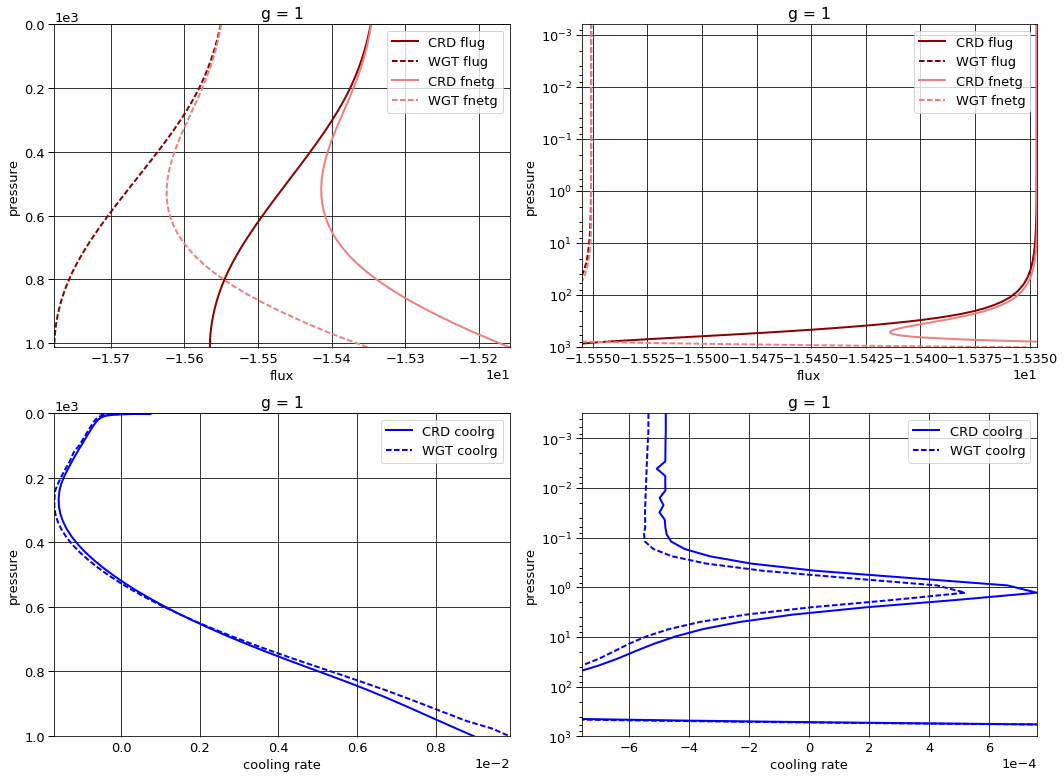

# Figure: flux, cooling rate. g-group 2

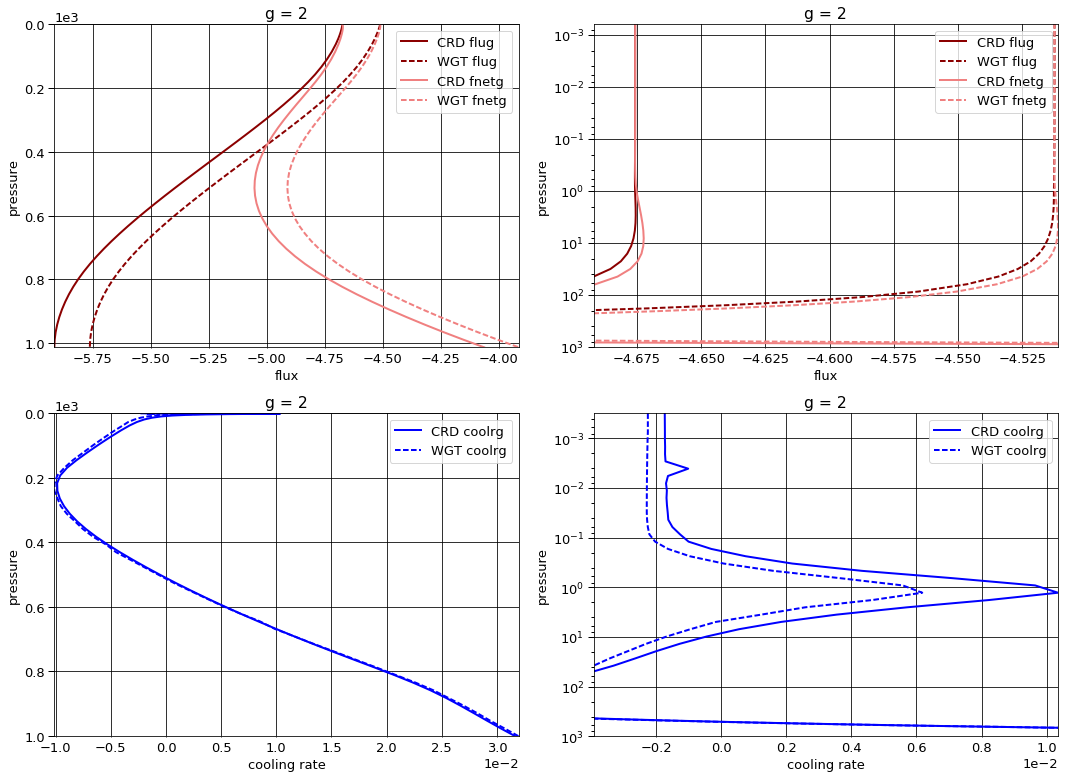

# Figure: flux, cooling rate. g-group 3

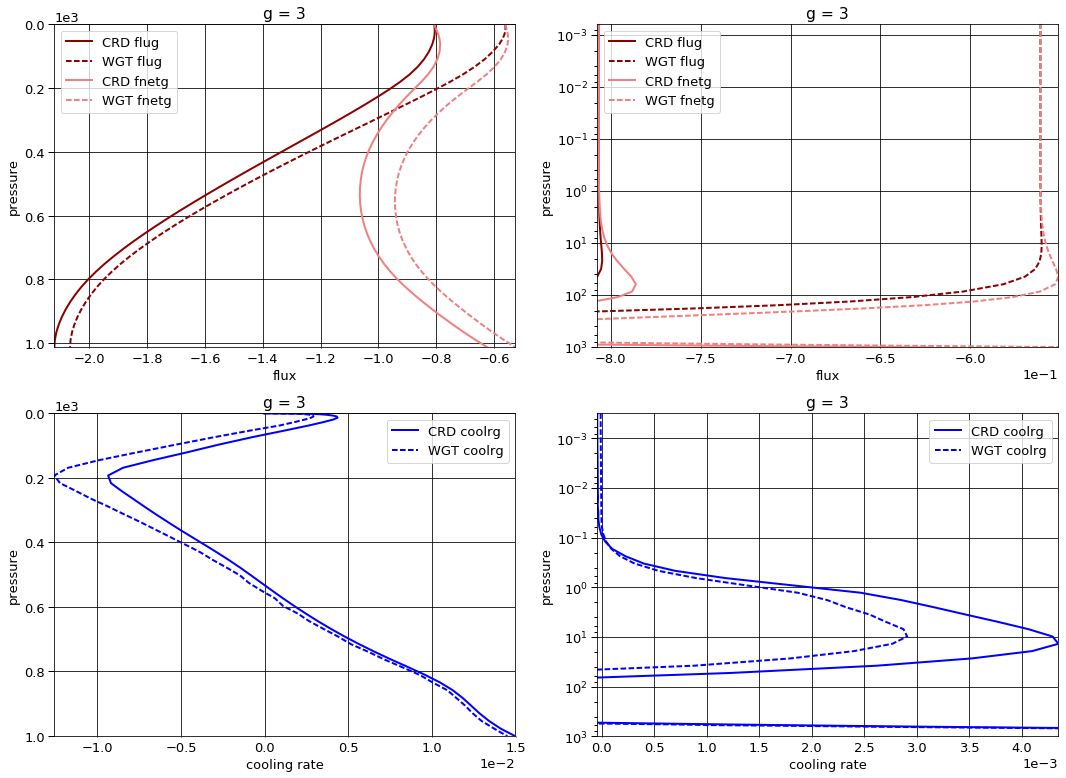

# Figure: flux, cooling rate. g-group 4

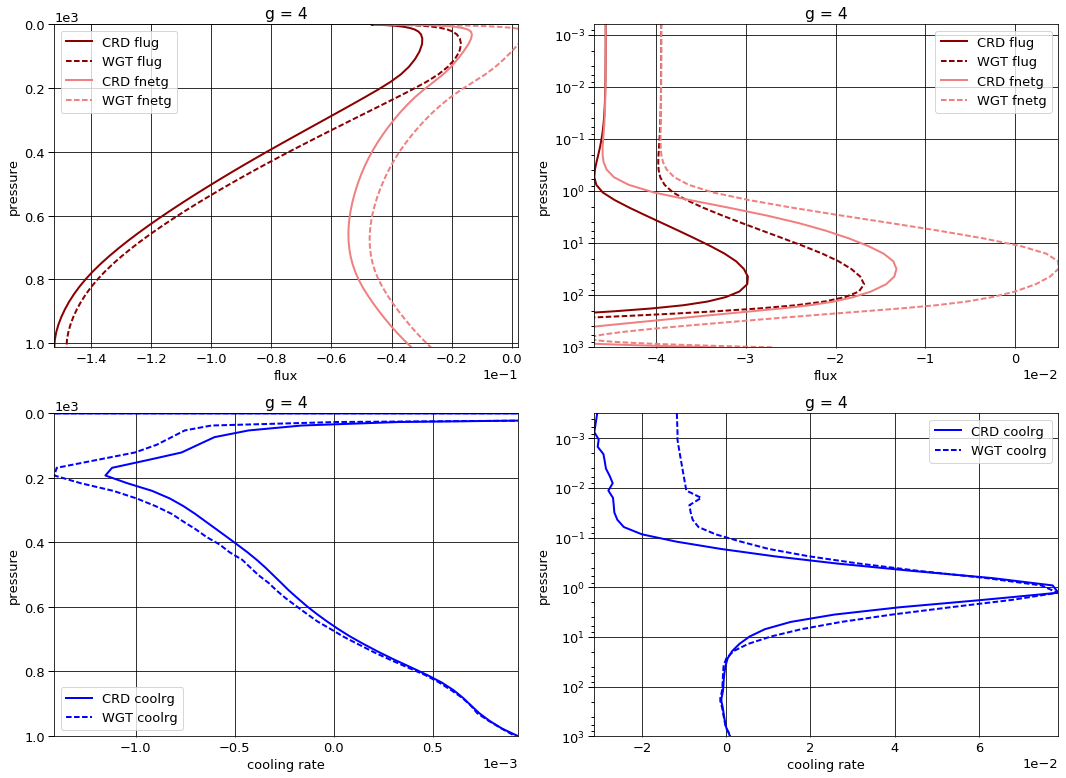

# Figure: flux, cooling rate. g-group total

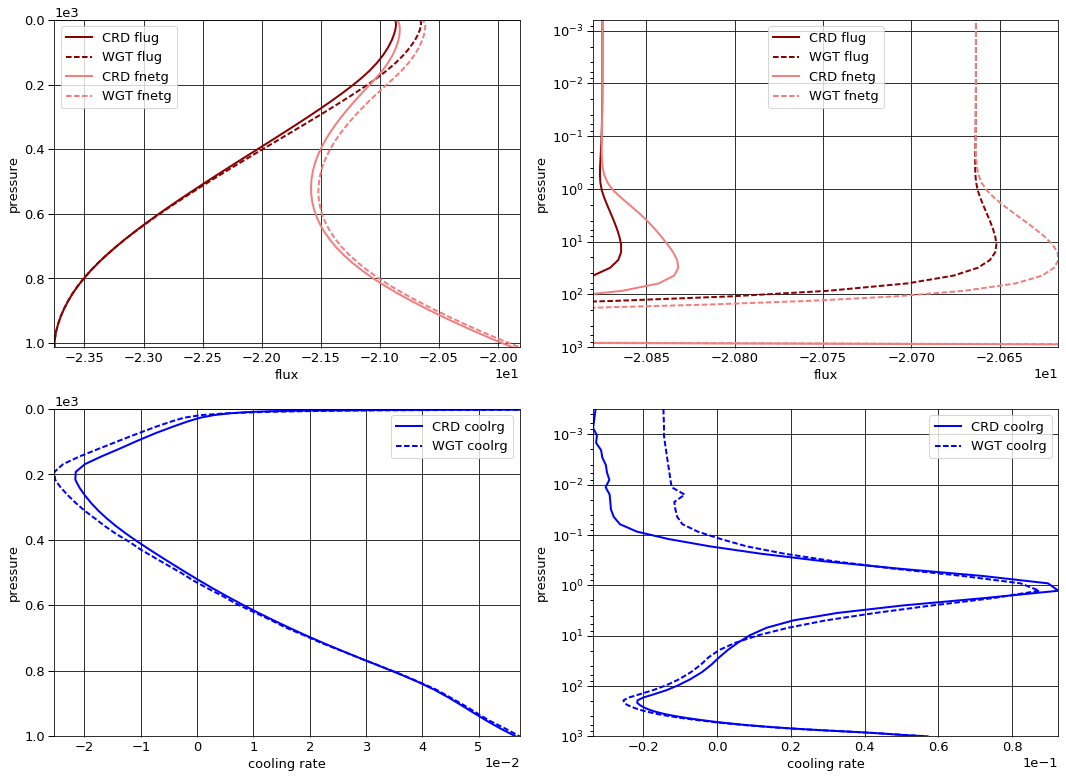

In [40]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [41]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0.0      1     -15.346779  0.000000 -15.346779
  1013.0   76    -15.565504  0.407841 -15.157663
2 0.0      1      -4.675754  0.000000  -4.675754
  1013.0   76     -5.916167  1.852617  -4.063550
3 0.0      1      -0.806666  0.000000  -0.806666
  1013.0   76     -2.121156  1.498506  -0.622650
4 0.0      1      -0.045555  0.000000  -0.045555
  1013.0   76     -0.152343  0.119015  -0.033328


WGT


flug      fldg      fnetg
g pressure level                                
1 0.0      1     -15.550765  0.000000 -15.550765
  1013.0   76    -15.777033  0.426274 -15.350759
2 0.0      1      -4.512428  0.000000  -4.512428
  1013.0   76     -5.763148  1.848508  -3.914640
3 0.0      1      -0.560885  0.000000  -0.560885
  1013.0   76     -2.066700  1.540997  -0.525703
4 0.0      1      -0.039388  0.000000  -0.039388
  1013.0   76     -0.148290  0.121394  -0.026896


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0.0      1     -0.203986  0.000000 -0.203986
  1013.0   76    -0.211529  0.018433 -0.193096
2 0.0      1      0.163326  0.000000  0.163326
  1013.0   76     0.153019 -0.004108  0.148910
3 0.0      1      0.245781  0.000000  0.245781
  1013.0   76     0.054456  0.042492  0.096948
4 0.0      1      0.006167  0.000000  0.006167
  1013.0   76     0.004053  0.002380  0.006433

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000479
  1001.112500 75     0.008979
2 0.000312    1     -0.001734
  1001.112500 75     0.031680
3 0.000312    1     -0.000043
  1001.112500 75     0.014978
4 0.000312    1     -0.030653
  1001.112500 75     0.000934


WGT


coolrg
g pressure    layer          
1 0.000312    1     -0.000536
  1001.112500 75     0.009883
2 0.000312    1     -0.002253
  1001.112500 75     0.031981
3 0.000312    1     -0.000010
  1001.112500 75     0.014497
4 0.000312    1     -0.011739
  1001.112500 75     0.000920


WGT - CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000058
  1001.112500 75     0.000905
2 0.000312    1     -0.000519
  1001.112500 75     0.000301
3 0.000312    1      0.000033
  1001.112500 75    -0.000481
4 0.000312    1      0.018914
  1001.112500 75    -0.000014

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-20.874753,0.000000,-20.874753
1013.0,76,-23.755170,3.877978,-19.877192



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-20.663466,0.000000,-20.663466
1013.0,76,-23.755171,3.937173,-19.817997



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,2.112875e-01,0.000000,0.211287
1013.0,76,-9.100000e-07,0.059195,0.059195


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.032908
1001.112500,75,0.056570



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.014538
1001.112500,75,0.057282



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.018370
1001.112500,75,0.000712


In [42]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.664152,0.653402
2,0.242606,0.250392
3,0.087000,0.089758
4,0.006242,0.006449


In [43]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,2.220000e-20
2,1.350000e-19
3,1.338287e-19


In [44]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')